# 3. Players Request

The following code demonstrates how to retrieve players' data from a MySQL database using Python's `pandas` library and the `mysql.connector` module.
The code begins by importing necessary libraries such as numpy, pandas, matplotlib.pyplot, and pathlib. It also imports the mysql.connector module for establishing a connection with the MySQL database.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import mysql.connector
import datetime
import math
from scipy import stats

We need to provide your MySQL database username and password in the variables username and user_password, respectively.
The code establishes a connection to the MySQL database using the mysql.connector.connect() method. You need to specify the host and database details accordingly.

In [3]:
username = 'root'
user_password = ''

In [4]:
cnx = mysql.connector.connect(
    user=username,
    password=user_password,
    host='localhost',
    database='test_project'
)

In [5]:
q_players_req = "SELECT c.name, clubs_season.goals_scored, clubs_season.goals_conceded FROM clubs_season JOIN clubs c on clubs_season.club_id = c.id JOIN seasons s on clubs_season.season_id = s.id WHERE start_date = 2021;"
players_req = pd.read_sql(q_players_req, con=cnx)
players_req

,name,goals_scored,goals_conceded
0,club3,39,38
1,club4,14,17
2,club2,31,33


#### - Goal Difference Efficiency (GDE)

The Goal Difference Efficiency (GDE) is a Key Performance Indicator (KPI) used to evaluate the performance of football teams based on their goal-scoring ability and defensive record. It provides insights into the relative strength of a team's attack compared to their defense.

#### - Formula

The GDE is calculated using the following formula:

GDE = Goals Scored / Goals Conceded


#### - Interpretation

A higher GDE value indicates a stronger attacking performance relative to defensive capabilities. It suggests that the team is effective at scoring goals while maintaining a solid defensive record. On the other hand, a lower GDE value signifies weaker attackers and potentially stronger defenses.

In [6]:
players_req["GDE"] = players_req["goals_scored"]/players_req["goals_conceded"]
players_req = players_req.sort_values(by="GDE", ascending=True)
players_req.head()

,name,goals_scored,goals_conceded,GDE
1,club4,14,17,0.823529
2,club2,31,33,0.939394
0,club3,39,38,1.026316


# 4. Manager Request

To evaluate players' performance based on the provided information and considering their position, we define a KPI called "Player Performance Index" (PPI). The PPI will be calculated differently for different player positions, taking into account their specific roles and contributions on the field.
Here's a breakdown of how the Player Performance Index (PPI) can be calculated for different player positions:

### Goalkeepers:
For goalkeepers, the PPI can be calculated using the following formula:
```
PPI_goalkeeper = clean_sheets * 10 + penalty_goals_conceded * (-5) + (minutes_played / 90) * 2
```
This formula awards points for keeping clean sheets (+10 points), penalizes for goals conceded from penalties (-5 points), and rewards playing time with 2 points for every 90 minutes played.

### Defenders:
For defenders, the PPI can be calculated using the following formula:
```
PPI_defender = clean_sheets * 5 + goals * 6 + assists * 3 + (minutes_played / 90) * 2
```
This formula awards points for clean sheets (+5 points), goals scored (+6 points), assists (+3 points), and rewards playing time with 2 points for every 90 minutes played.

### Midfielders:
For midfielders, the PPI can be calculated using the following formula:
```
PPI_midfielder = goals * 5 + assists * 7 + (minutes_played / 90) * 2
```
This formula awards points for goals scored (+5 points), assists (+7 points), and rewards playing time with 2 points for every 90 minutes played.

### Forwards:
For forwards, the PPI can be calculated using the following formula:
```
PPI_forward = goals * 8 + assists * 5 + (minutes_played / 90) * 2
```
This formula awards points for goals scored (+8 points), assists (+5 points), and rewards playing time with 2 points for every 90 minutes played.

In [33]:
q_manager_req = "SELECT p.name, ps.* ,c.name AS leagues, p.position, p.current_value, cs.rank FROM players_season ps JOIN clubs_season cs on ps.club_id = cs.club_id AND cs.season_id = ps.season_id JOIN players p on ps.player_id = p.id JOIN seasons s on ps.season_id = s.id JOIN competitions c on ps.club_id = c.id WHERE start_date = 2021;"
manager_req = pd.read_sql(q_manager_req, con=cnx)
manager_req.head()

,name,id,player_id,season_id,club_id,squad,appearance,point_per_goal,goals,assists,...,red_card,penalty_goals,goals_conceded,clean_sheets,minutes_per_goal,minutes_played,leagues,position,current_value,rank
0,ENYEY,1,1,1,1,24,20,1,2,0,...,1,6,14,10,1181,1078,league 1,Goalkeeper,82032.0,14
1,LIRGC,2,2,1,1,24,18,2,15,3,...,3,12,8,5,305,137,league 1,Centre-Back,62513.0,14
2,EMKFJ,3,3,1,2,24,21,1,6,1,...,1,15,13,14,1762,1599,league 2,Centre-Back,85781.0,18
3,MWEPR,4,4,1,1,24,22,3,7,2,...,2,9,15,13,1386,1159,league 1,Centre-Back,30613.0,14
4,ZQAFL,5,5,1,1,24,22,3,23,1,...,1,15,7,7,759,555,league 1,Centre-Forward,94374.0,14


In [34]:
replace_dict = {
    'Centre-Forward': 'Forward',
    'Centre-Back': 'Defender'
}
manager_req ['position'] = manager_req['position'].replace(replace_dict)
manager_req.head()

,name,id,player_id,season_id,club_id,squad,appearance,point_per_goal,goals,assists,...,red_card,penalty_goals,goals_conceded,clean_sheets,minutes_per_goal,minutes_played,leagues,position,current_value,rank
0,ENYEY,1,1,1,1,24,20,1,2,0,...,1,6,14,10,1181,1078,league 1,Goalkeeper,82032.0,14
1,LIRGC,2,2,1,1,24,18,2,15,3,...,3,12,8,5,305,137,league 1,Defender,62513.0,14
2,EMKFJ,3,3,1,2,24,21,1,6,1,...,1,15,13,14,1762,1599,league 2,Defender,85781.0,18
3,MWEPR,4,4,1,1,24,22,3,7,2,...,2,9,15,13,1386,1159,league 1,Defender,30613.0,14
4,ZQAFL,5,5,1,1,24,22,3,23,1,...,1,15,7,7,759,555,league 1,Forward,94374.0,14


In [23]:
manager_req.columns

Index(['name', 'id', 'player_id', 'season_id', 'club_id', 'squad',
       'appearance', 'point_per_goal', 'goals', 'assists', 'own_goals',
       'yellow_card', 'second_yellow_card', 'red_card', 'penalty_goals',
       'goals_conceded', 'clean_sheets', 'minutes_per_goal', 'minutes_played',
       'name', 'position', 'current_value', 'rank'],
      dtype='object')

In [35]:
manager_req['PPI'] = 0

for index, row in manager_req.iterrows():
    position = row['position']
    minutes_played = row['minutes_played']
    goals = row['goals']
    assists = row['assists']
    clean_sheets = row['clean_sheets']
    point_per_goal = row['point_per_goal']
    own_goals = row['own_goals']
    yellow_card = row['yellow_card']
    second_yellow_card = row['second_yellow_card']
    red_card = row['red_card']
    penalty_goals = row['penalty_goals']
    goals_conceded = row['goals_conceded']
    
    if position == 'Goalkeeper':
        manager_req.at[index, 'PPI'] = max(goals*(1) + assists*(3) + clean_sheets*(10) + yellow_card*(-1) + second_yellow_card*(-3) + red_card*(-5) + penalty_goals*(1) + goals_conceded*(-3) + own_goals*(-5) + point_per_goal*(0) , 0)
    elif position == 'Defender':
        manager_req.at[index, 'PPI'] = max(goals*(3) + assists*(5) + clean_sheets*(0) + yellow_card*(-1) + second_yellow_card*(-3) + red_card*(-5) + penalty_goals*(3) + goals_conceded*(0) + own_goals*(-5) + point_per_goal*(10) , 0)
    elif position == 'Midfielder':
        manager_req.at[index, 'PPI'] = max(goals*(5) + assists*(10) + clean_sheets*(0) + yellow_card*(-1) + second_yellow_card*(-3) + red_card*(-5) + penalty_goals*(3) + goals_conceded*(0) + own_goals*(-5) + point_per_goal*(10) , 0)
    elif position == 'Forward':
        manager_req.at[index, 'PPI'] = max(goals*(10) + assists*(5) + clean_sheets*(0) + yellow_card*(-1) + second_yellow_card*(-3) + red_card*(-5) + penalty_goals*(3) + goals_conceded*(0) + own_goals*(-5) + point_per_goal*(10) , 0)

manager_req.head()

,name,id,player_id,season_id,club_id,squad,appearance,point_per_goal,goals,assists,...,penalty_goals,goals_conceded,clean_sheets,minutes_per_goal,minutes_played,leagues,position,current_value,rank,PPI
0,ENYEY,1,1,1,1,24,20,1,2,0,...,6,14,10,1181,1078,league 1,Goalkeeper,82032.0,14,0
1,LIRGC,2,2,1,1,24,18,2,15,3,...,12,8,5,305,137,league 1,Defender,62513.0,14,0
2,EMKFJ,3,3,1,2,24,21,1,6,1,...,15,13,14,1762,1599,league 2,Defender,85781.0,18,0
3,MWEPR,4,4,1,1,24,22,3,7,2,...,9,15,13,1386,1159,league 1,Defender,30613.0,14,0
4,ZQAFL,5,5,1,1,24,22,3,23,1,...,15,7,7,759,555,league 1,Forward,94374.0,14,262


In [36]:
manager_req['PPI_Percentile'] = manager_req['PPI'].rank(pct=True)
manager_req['Value_Percentile'] = manager_req['current_value'].rank(pct=True)

top_performer_threshold = manager_req['PPI_Percentile'].quantile(0.6)
cheapest_players_threshold = manager_req['Value_Percentile'].quantile(0.7)

filtered_players = manager_req[
    (manager_req['PPI_Percentile'] >= top_performer_threshold) &
    (manager_req['Value_Percentile'] <= cheapest_players_threshold)
]

filtered_players = filtered_players.sort_values(by='PPI', ascending=False).head()
filtered_players

,name,id,player_id,season_id,club_id,squad,appearance,point_per_goal,goals,assists,...,clean_sheets,minutes_per_goal,minutes_played,leagues,position,current_value,rank,PPI,PPI_Percentile,Value_Percentile
18,NHYNL,19,19,1,1,24,18,1,40,2,...,7,741,611,league 1,Forward,73240.0,14,372,1.000000,0.681818
6,XFEQR,7,7,1,1,24,21,2,35,8,...,15,1282,1146,league 1,Forward,60889.0,14,365,0.954545,0.409091
13,MMYKB,14,14,1,2,24,21,1,16,6,...,8,1574,1382,league 2,Forward,29641.0,18,147,0.772727,0.136364
19,BZMZU,20,20,1,3,24,20,3,19,3,...,13,495,359,league 3,Forward,72105.0,1,108,0.727273,0.636364
14,OFCTP,15,15,1,3,24,19,2,1,1,...,15,1975,1692,league 3,Goalkeeper,56943.0,1,86,0.681818,0.363636


### 4.1. Compare Distribution of Filtered Players' Performance with All Players

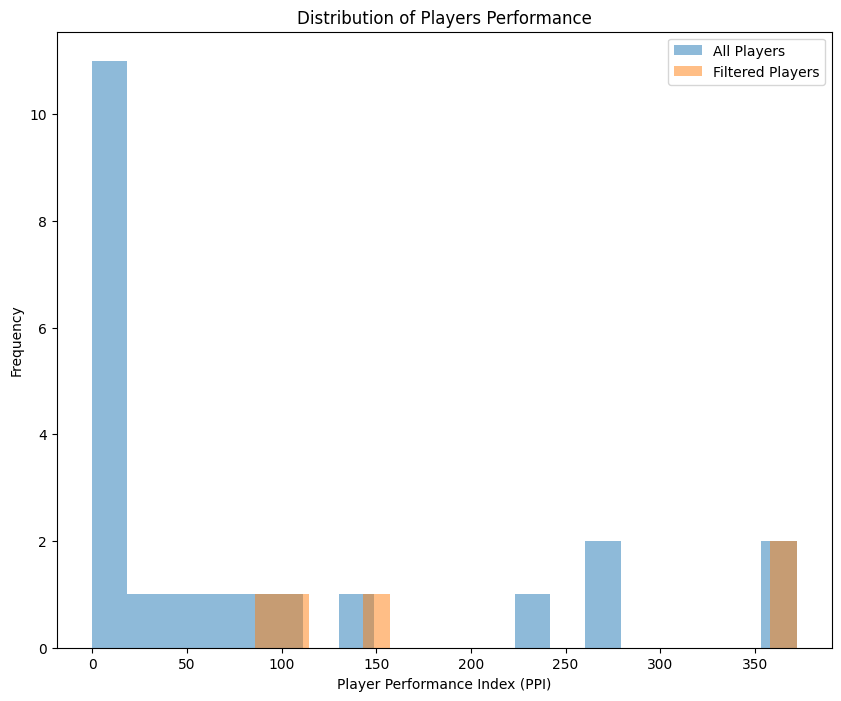

In [37]:
fig, axes1 = plt.subplots(figsize=(10, 8))
axes1.hist(manager_req['PPI'], bins=20, alpha=0.5, label='All Players')
axes1.hist(filtered_players['PPI'], bins=20, alpha=0.5, label='Filtered Players')
axes1.set_xlabel('Player Performance Index (PPI)')
axes1.set_ylabel('Frequency')
axes1.set_title('Distribution of Players Performance')
axes1.legend()

plt.show()

### 4.2. Compare Distribution of Filtered Players' Value with All Players

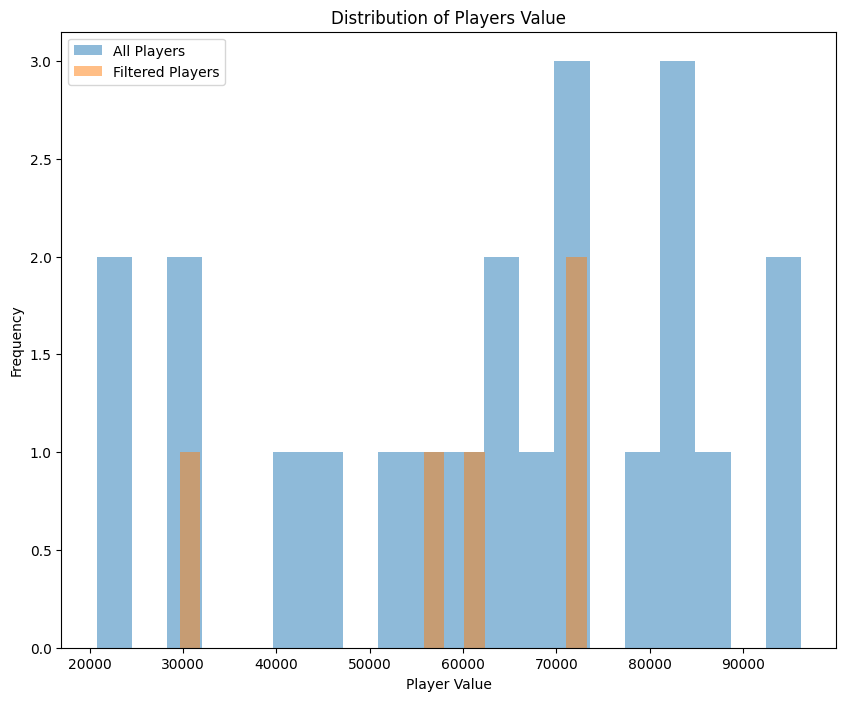

In [38]:
fig, axes2 = plt.subplots(figsize=(10, 8))
axes2.hist(manager_req['current_value'], bins=20, alpha=0.5, label='All Players')
axes2.hist(filtered_players['current_value'], bins=20, alpha=0.5, label='Filtered Players')
axes2.set_xlabel('Player Value')
axes2.set_ylabel('Frequency')
axes2.set_title('Distribution of Players Value')
axes2.legend()

plt.show()

### 4.3. Compare Distribution of Filtered Players' position with All Players

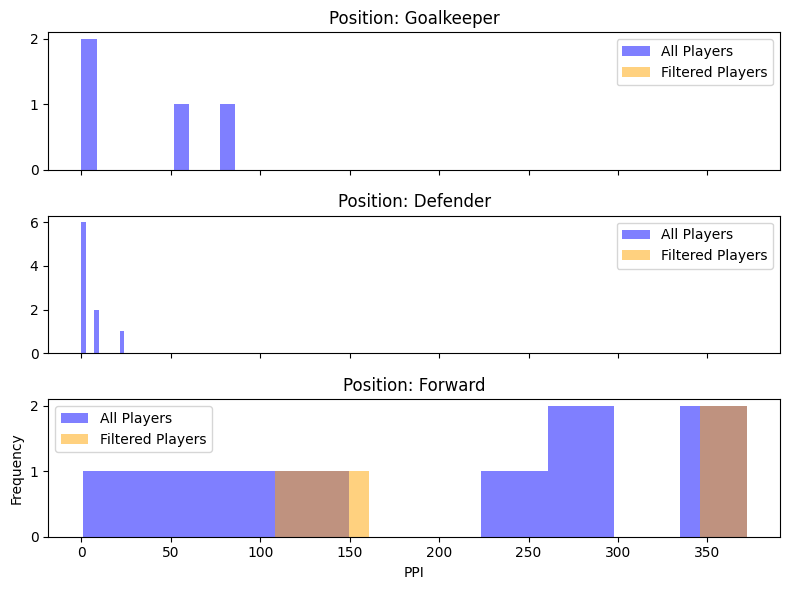

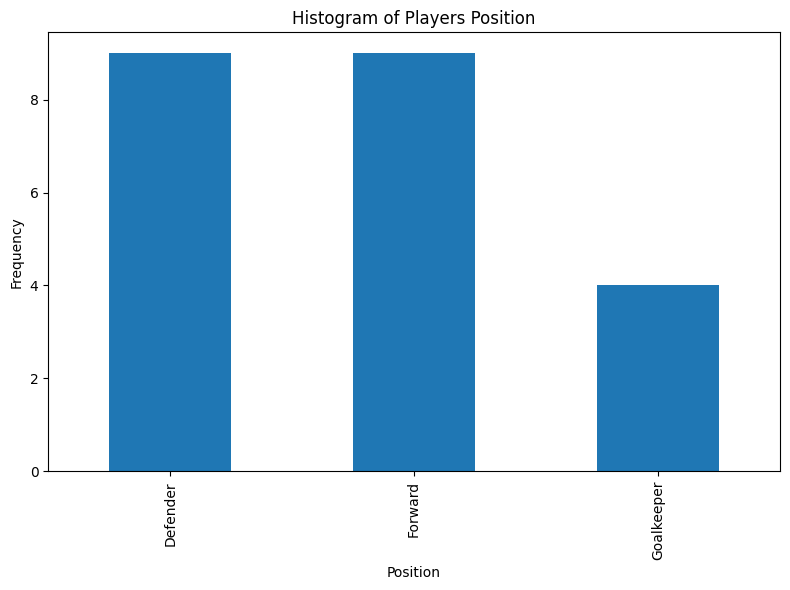

In [58]:
fig, axs = plt.subplots(len(manager_req['position'].unique()), 1, figsize=(8, 6), sharex=True)

for i, position in enumerate(manager_req['position'].unique()):
    filtered_position = filtered_players[filtered_players['position'] == position]['PPI']
    all_position = manager_req[manager_req['position'] == position]['PPI']
    
    axs[i].hist(all_position, bins=10, alpha=0.5, label='All Players', color='blue')
    axs[i].hist(filtered_position, bins=10, alpha=0.5, label='Filtered Players', color='orange')
    axs[i].set_title(f"Position: {position}")
    axs[i].legend()

plt.xlabel('PPI')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

category_counts = manager_req['position'].value_counts()

plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar')

plt.xlabel('Position')
plt.ylabel('Frequency')
plt.title('Histogram of Players Position')

plt.tight_layout()
plt.show()


### 4.4. Identifying Underperforming Players

In [57]:
#top_leagues = ['Premier League', 'La Liga', 'Bundesliga', 'Serie A', 'Ligue 1']
top_leagues = ['league 1 ','league 2', 'league 3']
chamipoins = manager_req[manager_req['rank'] == 1 & manager_req['leagues'].isin(top_leagues)]

q1 = chamipoins['PPI'].quantile(0.25)
q3 = chamipoins['PPI'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = chamipoins[(chamipoins['PPI'] < lower_bound) | (chamipoins['PPI'] > upper_bound)]
outliers = outliers.sort_values('PPI', ascending=False)
outliers

,name,id,player_id,season_id,club_id,squad,appearance,point_per_goal,goals,assists,...,clean_sheets,minutes_per_goal,minutes_played,leagues,position,current_value,rank,PPI,PPI_Percentile,Value_Percentile
20,FHDTY,21,21,1,3,24,21,2,29,0,...,11,1498,1339,league 3,Forward,81747.0,1,270,0.909091,0.772727
